# The Sparks Foundation - *Graduate Rotational Internship Program*
## Data Science & Business Analytics Tasks

### *Task 2 : Prediction using Unsupervised ML*
   #### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## 1. IMPORT LIBRARIES

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from scipy.spatial.distance import cdist 

In [7]:
df = pd.read_csv("E:/TSF-Singapore/Task-2/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.shape

(150, 6)

<AxesSubplot:>

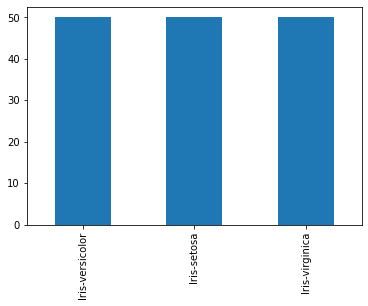

In [10]:
df['Species'].value_counts().plot(kind='bar')

#### So our Class Variable are of 3 types : 
- Versicolor
- Setosa
- Virginica

*All 3 classes have Equal Proportion of samples*

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Inferences:
- Data seems to be normally distributed as Mean and Median are having similar values for each Species
- Other than ID, all other column are float type
- There are No Null Values in the given data
- Data has 150 rows and  6 Columns

## 2. Data Visualization

### *2.1 Univariate Analysis*

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Density'>

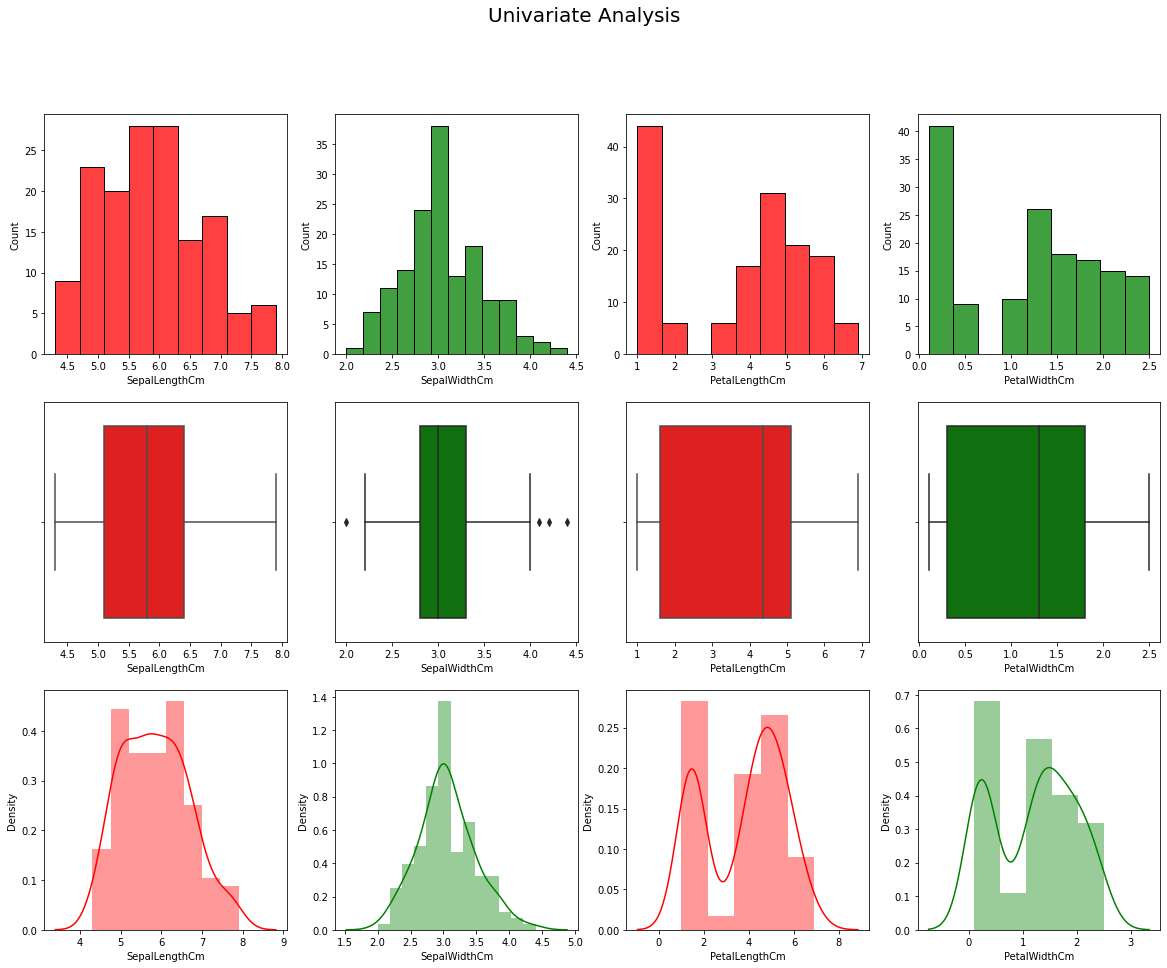

In [17]:
import warnings
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(3,4, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.histplot(x='SepalLengthCm',data=df,ax=axes[0,0],color='red')
sns.histplot(x='SepalWidthCm',data=df,ax=axes[0,1],color='green')
sns.histplot(x='PetalLengthCm',data=df,ax=axes[0,2],color='red')
sns.histplot(x='PetalWidthCm',data=df,ax=axes[0,3],color='green')
sns.boxplot(x='SepalLengthCm',data=df,ax=axes[1,0],color='red')
sns.boxplot(x='SepalWidthCm',data=df,ax=axes[1,1],color='green')
sns.boxplot(x='PetalLengthCm',data=df,ax=axes[1,2],color='red')
sns.boxplot(x='PetalWidthCm',data=df,ax=axes[1,3],color='green')
sns.distplot(df['SepalLengthCm'],ax=axes[2,0],color='red')
sns.distplot(df['SepalWidthCm'],ax=axes[2,1],color='green')
sns.distplot(df['PetalLengthCm'],ax=axes[2,2],color='red')
sns.distplot(df['PetalWidthCm'],ax=axes[2,3],color='green')

In [23]:
IQR_SL = stats.iqr(df['SepalLengthCm'], interpolation = 'midpoint')
IQR_SW = stats.iqr(df['SepalWidthCm'], interpolation = 'midpoint')
IQR_PL = stats.iqr(df['PetalLengthCm'], interpolation = 'midpoint')
IQR_PW = stats.iqr(df['PetalWidthCm'], interpolation = 'midpoint')
print('IQR of Sepal Length is ' + str(IQR_SL)+'\n' + 'IQR of Sepal Width is ' +str(IQR_SW)+'\n' + 'IQR of Petal Length is ' +str(IQR_PL)+'\n' + 'IQR of Petal Width is ' +str(IQR_PW))

IQR of Sepal Length is 1.3000000000000007
IQR of Sepal Width is 0.5
IQR of Petal Length is 3.4999999999999996
IQR of Petal Width is 1.5


In [39]:
df.skew(),df.kurtosis()

(Id               0.000000
 SepalLengthCm    0.314911
 SepalWidthCm     0.334053
 PetalLengthCm   -0.274464
 PetalWidthCm    -0.104997
 dtype: float64,
 Id              -1.200000
 SepalLengthCm   -0.552064
 SepalWidthCm     0.290781
 PetalLengthCm   -1.401921
 PetalWidthCm    -1.339754
 dtype: float64)

### Inferences:
- All the columns seems to be Normally Distributed
- There are 4 Outliers present in Sepal Width
- Most Sepal Length is 5.5 to 6.2 cm
- Most Sepal Width is 2.8 to 3.2 cm
- Most Petal Length is 1 cm
- Mostt Petal Width is 0.25 cm

### *2.2 Bivariate Analysis*

In [43]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


Text(0.5, 0.98, 'SL vs SW Plot')

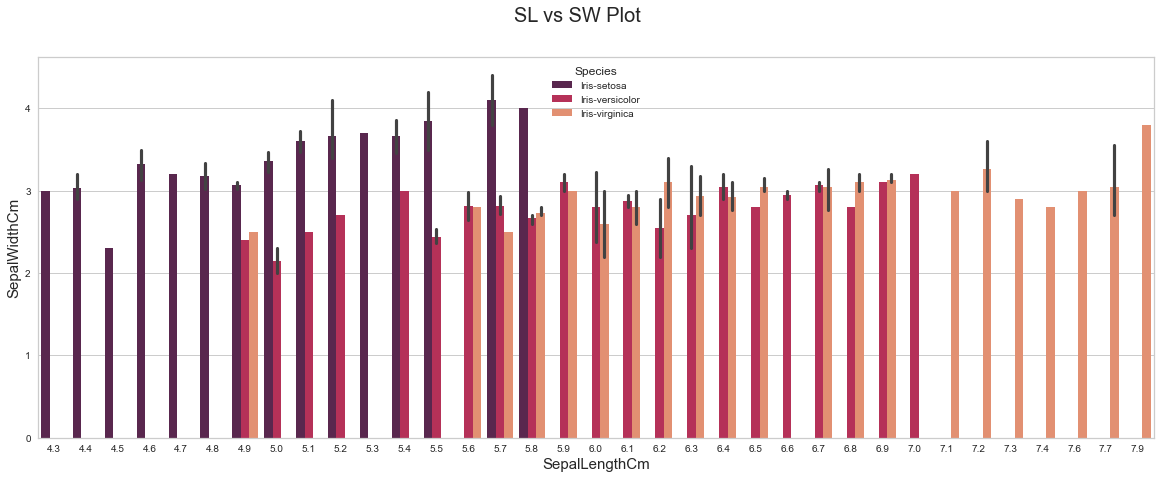

In [73]:
fig, axes = plt.subplots(figsize=(20, 7))
sns.barplot(x='SepalLengthCm',y='SepalWidthCm',data=df,axes=axes,hue='Species',palette='rocket')
plt.xlabel('SepalLengthCm',fontsize=15)
plt.ylabel('SepalWidthCm',fontsize=15)
plt.suptitle('SL vs SW Plot',fontsize=20)

Text(0.5, 0.98, 'PL vs PW Plot')

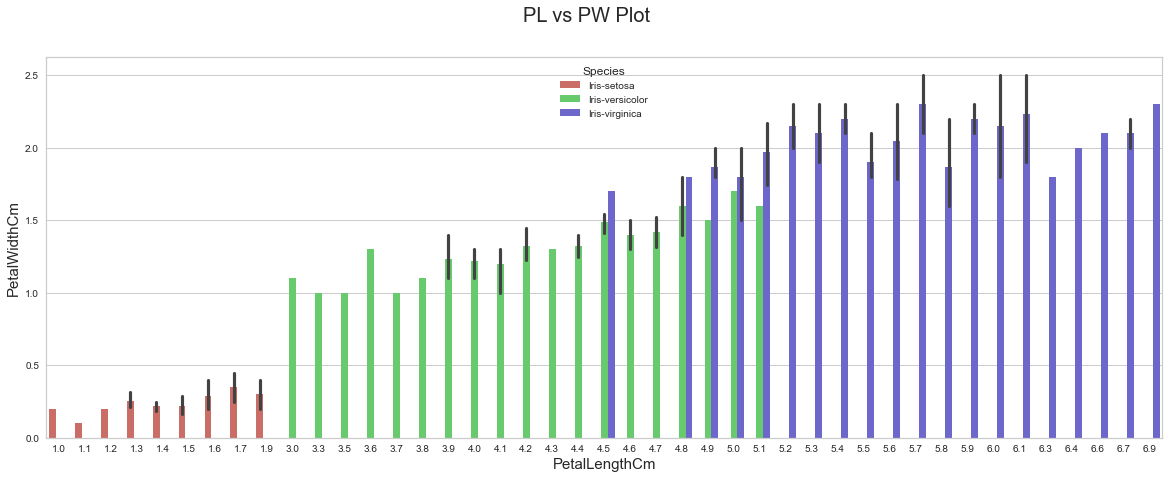

In [74]:
fig, axes = plt.subplots(figsize=(20, 7))
sns.barplot(x='PetalLengthCm',y='PetalWidthCm',data=df,axes=axes,hue='Species',palette='hls')
plt.xlabel('PetalLengthCm',fontsize=15)
plt.ylabel('PetalWidthCm',fontsize=15)
plt.suptitle('PL vs PW Plot',fontsize=20)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

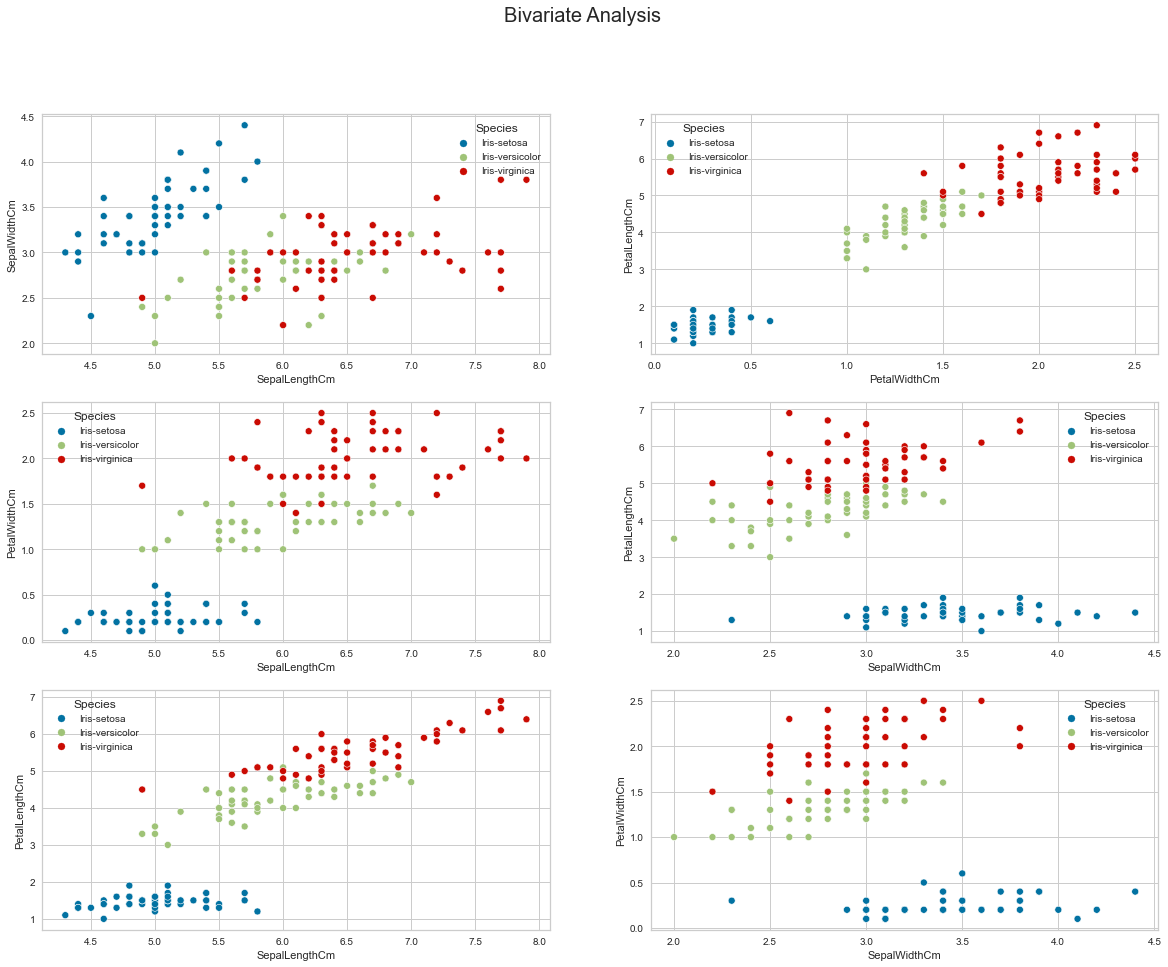

In [83]:
fig, axes = plt.subplots(3,2, figsize=(20, 15))
fig.suptitle('Bivariate Analysis',fontsize=20)

sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,ax=axes[0,0],hue='Species')
sns.scatterplot(x='PetalWidthCm',y='PetalLengthCm',data=df,ax=axes[0,1],hue='Species')
sns.scatterplot(x='SepalLengthCm',y='PetalWidthCm',data=df,ax=axes[1,0],hue='Species')
sns.scatterplot(x='SepalWidthCm',y='PetalLengthCm',data=df,ax=axes[1,1],hue='Species')
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,ax=axes[2,0],hue='Species')
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=df,ax=axes[2,1],hue='Species')

<AxesSubplot:>

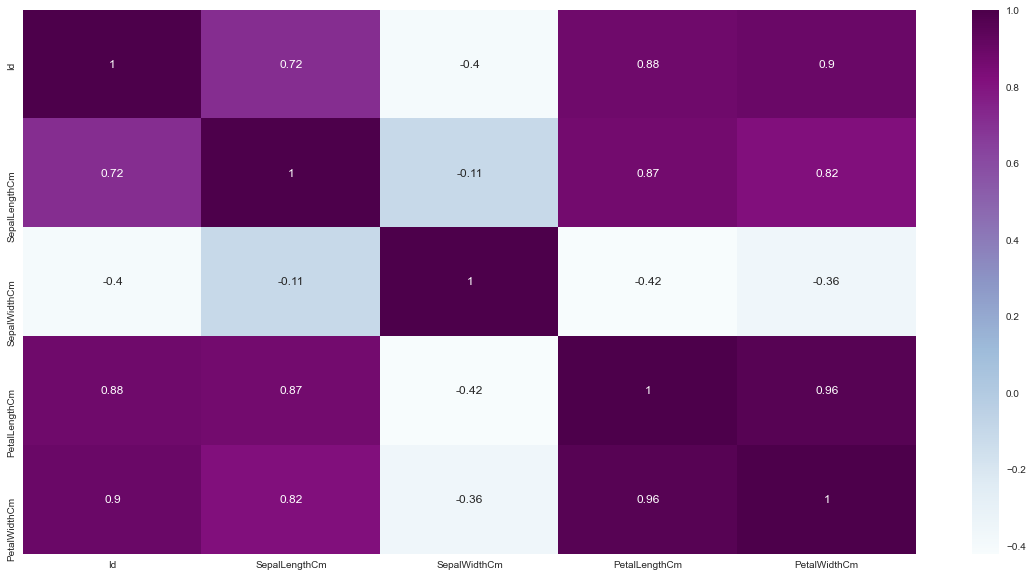

In [42]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,cmap='BuPu')

### Inferences:
- Sepal Length and Petal Length have Good Positive Correlation (0.87)
- Sepal Length and Petal Width have Good Positive Correlation (0.82)
- Sepal Width and Petal Length have Negative Correlation (-0.42)
- Petal Length and Petal Width have very Good Positive Correlation (0.96)

## 3. Performing Cluster Analysis

### 3.1 DB SCAN

In [85]:
df1 = df.copy()
df1 = df1.iloc[:,1:-1]
df1.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [312]:
dbscan = DBSCAN(eps=0.55,min_samples=8)
dbscan.fit(df1)

DBSCAN(eps=0.55, min_samples=8)

In [313]:
dbcluster = pd.DataFrame(dbscan.labels_,columns=['DBSCAN_Cluster'])
dbcluster.head()

,DBSCAN_Cluster
0,0
1,0
2,0
3,0
4,0


In [314]:
dbcluster['DBSCAN_Cluster'].value_counts()

 1    86
 0    49
-1    15
Name: DBSCAN_Cluster, dtype: int64

In [315]:
silhouette_score(df1,dbscan.labels_)

0.5130521002227988

### 3.2 K-Means

In [316]:
kmean = KMeans(random_state=42)

In [365]:
visualizer1 = KElbowVisualizer(kmean, k=(2,6), metric='distortion')
# metric = 'distortion' uses "mean sum of squared distances to centers"

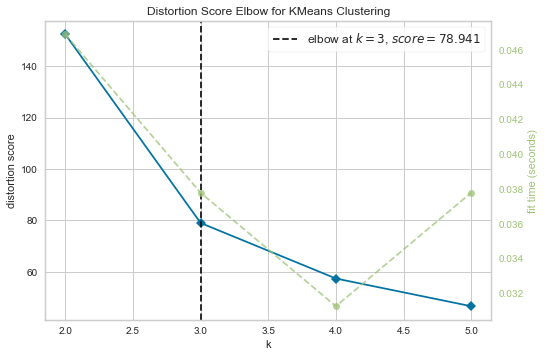

In [366]:
visualizer1.fit(df1)    
visualizer1.poof()
plt.show()

In [367]:
list1= [3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = clusterer1.fit_predict(df1)
    sil_score1= silhouette_score(df1, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 3 The average silhouette_score is : 0.5525919445499757
For n_clusters = 4 The average silhouette_score is : 0.4978256901095472
For n_clusters = 5 The average silhouette_score is : 0.4885175508886279
For n_clusters = 6 The average silhouette_score is : 0.36820569682713084
For n_clusters = 7 The average silhouette_score is : 0.3576975600180635
For n_clusters = 8 The average silhouette_score is : 0.35912838676456094
For n_clusters = 9 The average silhouette_score is : 0.3423796791000656
For n_clusters = 10 The average silhouette_score is : 0.31659552132968305


#### 3 Number of Clusters is the prominent one as observed from Silhouette Score Calculation and also from Visualizer

### 3.3 H-Cluster

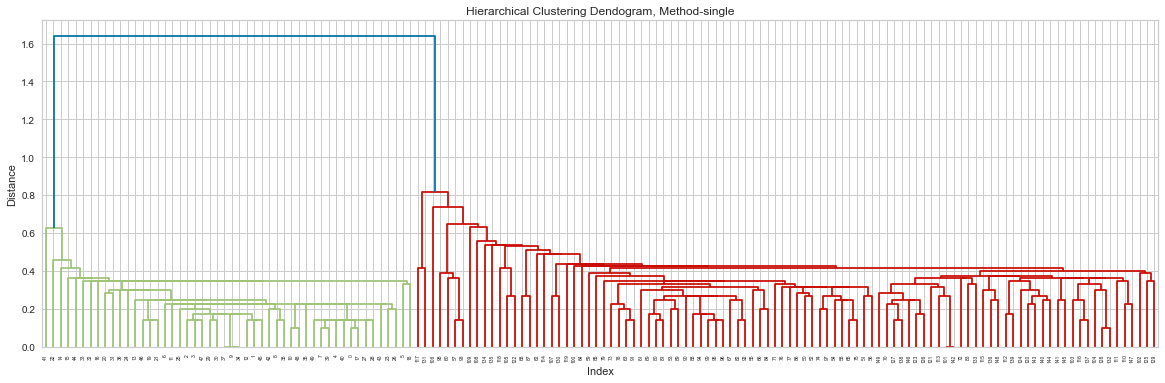

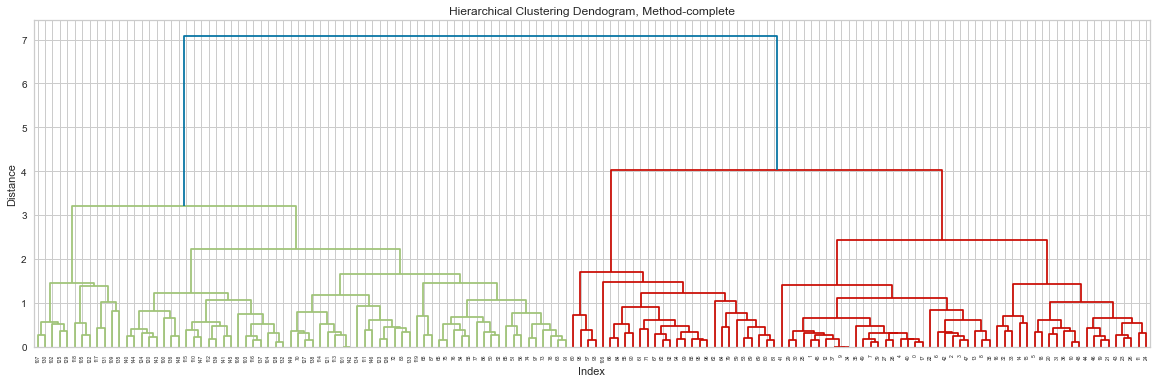

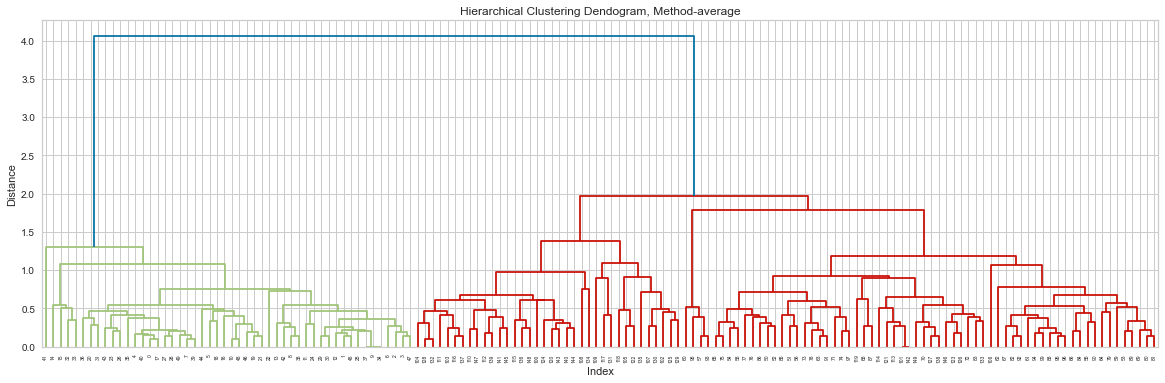

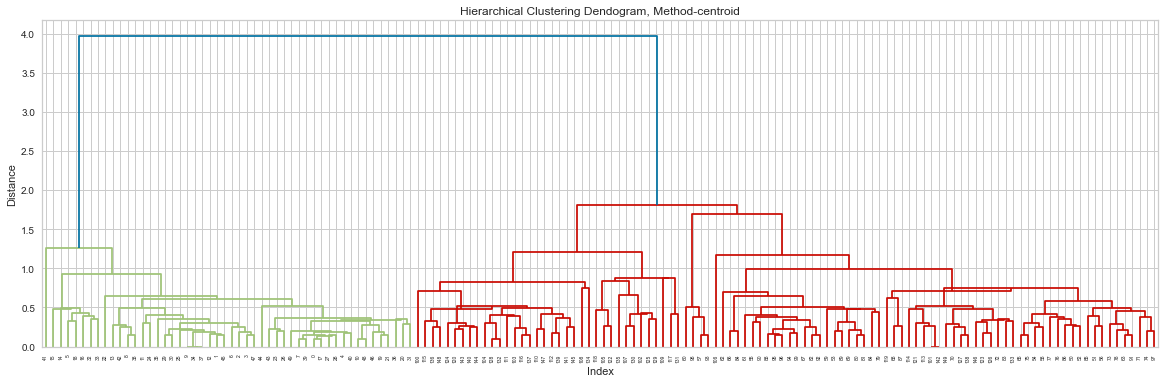

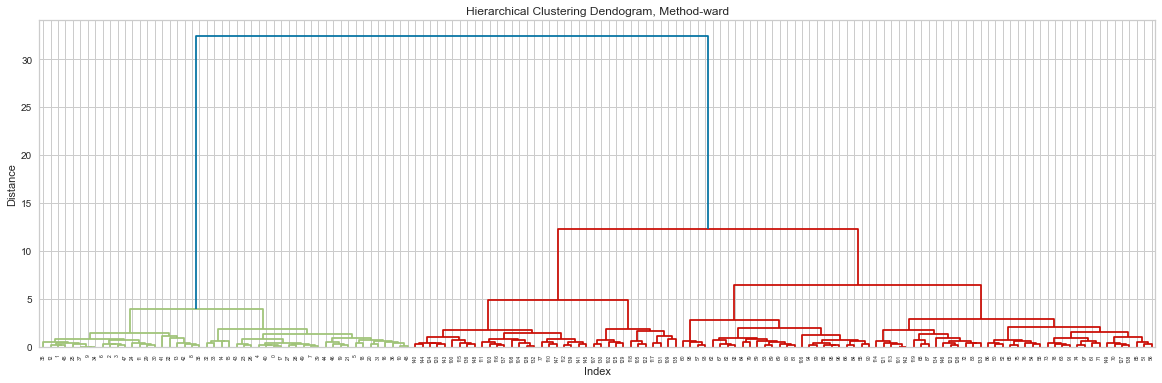

In [370]:
for methods in ['single','complete','average','centroid','ward']:
    z = linkage(df1,method=methods, metric = "euclidean")
    plt.figure(figsize=(20,6))
    plt.title('Hierarchical Clustering Dendogram, Method-{}'.format(methods))
    plt.xlabel('Index')
    plt.ylabel('Distance')
    sch.dendrogram(z)
    plt.show()

In [373]:
n_clusters = [3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["single","complete","average","ward"]:
        hie_cluster = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels = hie_cluster.fit_predict(df1)
        silhouette_score1 = silhouette_score(df1, hie_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 3 The average silhouette_score with linkage- single : 0.5118387098922373
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5133502348448076
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5539343898551252
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5540972908150553

For n_clusters = 4 The average silhouette_score with linkage- single : 0.28177774044073334
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4995741149430846
For n_clusters = 4 The average silhouette_score with linkage- average : 0.47166531675930684
For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4887398491004218

For n_clusters = 5 The average silhouette_score with linkage- single : 0.2834836728123189
For n_clusters = 5 The average silhouette_score with linkage- complete : 0.34999771139358965
For n_clusters = 5 The average silhouette_score with linkage- average : 0.4303416822141368


#### 3 Number of Clusters is the prominent one as observed from Silhouette Score Calculation and also from Hierarchy created

## 4. Cluster Visualization

### 4.1 DB SCAN Clustering

Text(0.5, 1.0, 'Clustering using DBSCAN')

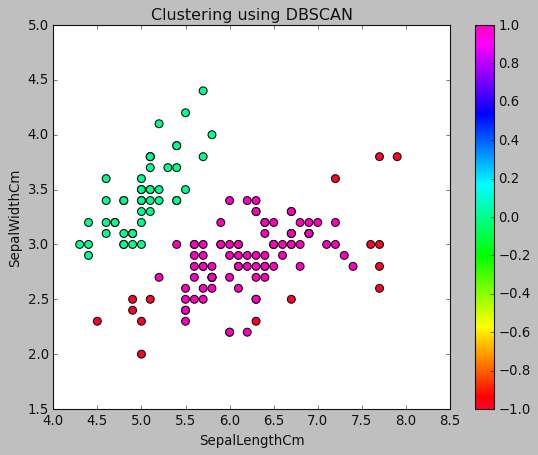

In [426]:
D = DBSCAN(eps=0.55,min_samples=8)
d = D.fit(df1)
df1.plot(x="SepalLengthCm",y="SepalWidthCm",c=D.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN')

### 4.2 K-Means Clustering

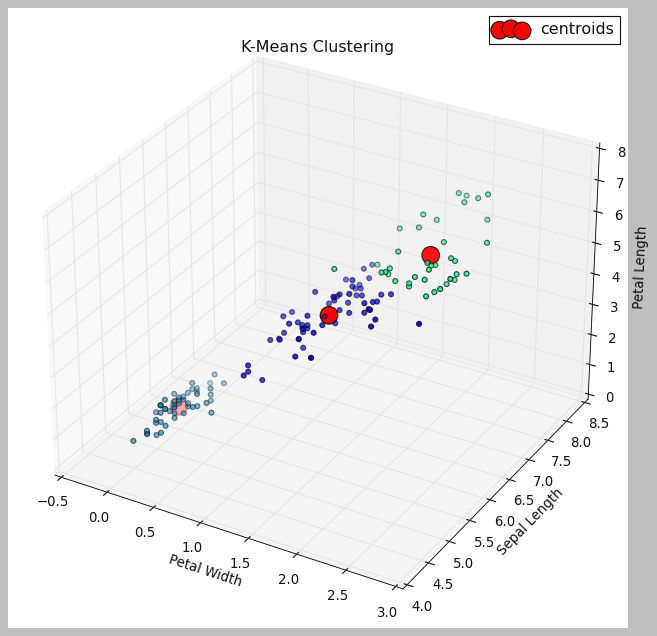

In [408]:
model1 = KMeans(random_state=42,n_clusters=3)
a = model1.fit_predict(df1)
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(model1.cluster_centers_[:, 3],
            model1.cluster_centers_[:, 0],
            model1.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(df1['PetalWidthCm'],df1['SepalLengthCm'], df1['PetalLengthCm'],
                     c=a,s=20, cmap='winter')


ax.set_title('K-Means Clustering')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()

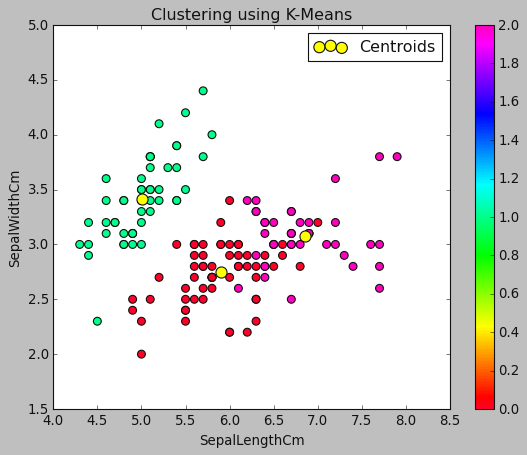

In [428]:
K = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
ykmeans = K.fit_predict(df1)
plt.style.use('classic')
df1.plot(x="SepalLengthCm",y="SepalWidthCm",c=K.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means')
plt.scatter(K.cluster_centers_[:, 0], K.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

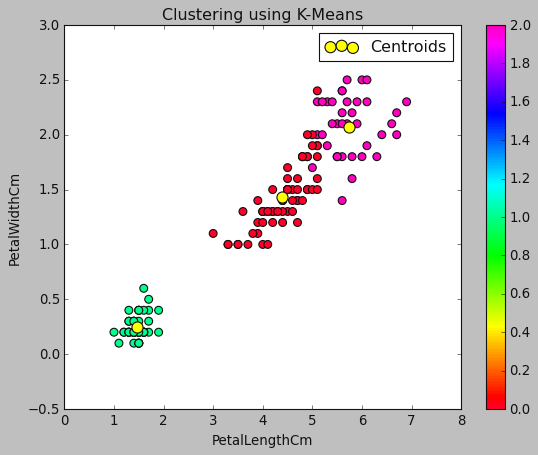

In [429]:
K = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
ykmeans = K.fit_predict(df1)
plt.style.use('classic')
df1.plot(x="PetalLengthCm",y="PetalWidthCm",c=K.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means')
plt.scatter(K.cluster_centers_[:, 2], K.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

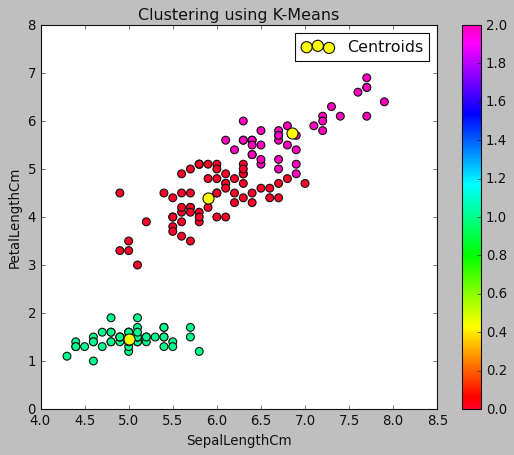

In [430]:
K = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
ykmeans = K.fit_predict(df1)
plt.style.use('classic')
df1.plot(x="SepalLengthCm",y="PetalLengthCm",c=K.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means')
plt.scatter(K.cluster_centers_[:, 0], K.cluster_centers_[:,2], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

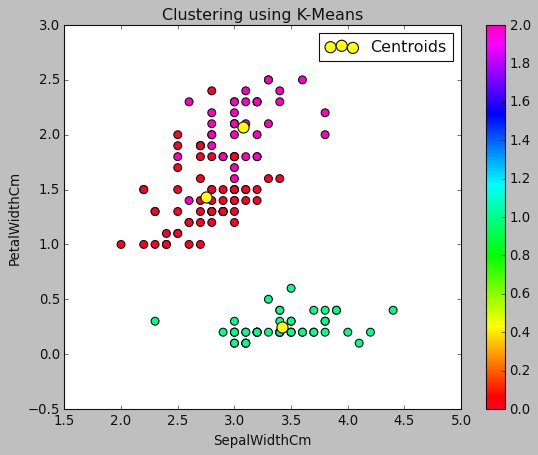

In [431]:
K = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
ykmeans = K.fit_predict(df1)
plt.style.use('classic')
df1.plot(x="SepalWidthCm",y="PetalWidthCm",c=K.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means')
plt.scatter(K.cluster_centers_[:, 1], K.cluster_centers_[:,3], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

### 4.2 Hierarchical Clustering

Text(0.5, 1.0, 'Clustering using K-Means')

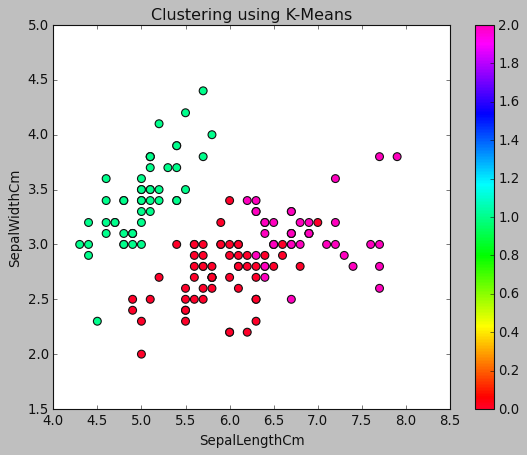

In [418]:
H = AgglomerativeClustering(n_clusters=3,linkage='ward') # bydefault it takes linkage 'ward'
hie_labels = H.fit_predict(df1)
plt.style.use('classic')
df1.plot(x="SepalLengthCm",y="SepalWidthCm",c=hie_labels,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means')

## Conclusion:
- From all the 3 Methods of Clustering, Number of Clusters = 3 is the prominent one
- Number of Clusters were choosed based on Silhoutte Score and Visualizer
- K-Means Cluster method is the best Clustering Technique because DBSCAN is good for large data sets and is used mostly for Non-Linear data.